# Importando os pacotes

In [ ]:
from keras.datasets import mnist # Mnist is the dataset for the 10 digits
from keras import models
from keras import layers
from keras.utils import to_categorical
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

# Lendo os dados

Aqui, os dados são lidos com a função load_data() e automaticamente separados em dados de treino e teste.
Embaixo tenhos uma imagem das imagens do dataset.

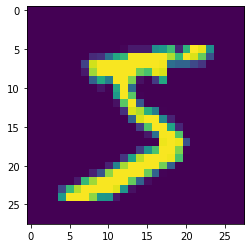

In [ ]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

plt.imshow(train_images[0])

# Criando e compilando a rede neural

Rede neural densa para resolver esse problema.

In [ ]:
network = models.Sequential()
network.add(layers.Dense(512, activation = 'relu', input_shape = (28 * 28,)))
network.add(layers.Dense(10, activation = 'softmax'))

network.compile(optimizer = 'rmsprop',
                loss = 'categorical_crossentropy',
                metrics = ['accuracy'])

# Convertendo a matriz dos dados para um formato mais conveniente para a rede

Deve ser compatível com o input_shape colocado na primeira camada.

Além disso, os valores foram normalizados.

In [ ]:
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28*28))
test_images = test_images.astype('float32') / 255

# Ajusta dos labels (respostas)

Como o problema é do tipo de categorização, utilizamos o comando to_categorical nas respostas dos nossos dados.

In [ ]:
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

# Treinando a rede

In [ ]:
network.fit(train_images, train_labels, epochs = 5, batch_size = 32)

Epoch 1/5
1875/1875 [==============================] - 10s 6ms/step - loss: 0.2012 - accuracy: 0.9407
Epoch 2/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0883 - accuracy: 0.9750
Epoch 3/5
1875/1875 [==============================] - 10s 6ms/step - loss: 0.0642 - accuracy: 0.9821
Epoch 4/5
1875/1875 [==============================] - 10s 6ms/step - loss: 0.0499 - accuracy: 0.9862
Epoch 5/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0393 - accuracy: 0.9893


# Testano o resultado do treino com os dados de teste

In [ ]:
test_loss, test_acc  = network.evaluate(test_images, test_labels)
print('test_acc = ', test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.0849 - accuracy: 0.9791
test_acc =  0.9790999889373779


# Teste com uma imagem de fora do mnist


---
Vamos testar se a rede  consegue identificar uma imagem de fora do dataset mnist. A imagem utilizada, mostrada abaixo, tem resolução diferente daquelas presentes no dataset, e também está em outra escala de cores, então precisamos tanto mudar sua resolução quanto sua escala.

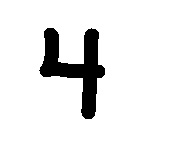

AxesImage(54,36;334.8x217.44)


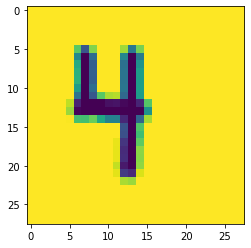

In [ ]:
size = 28, 28
image = Image.open('four.jpg').convert('L')
image_resized = image.resize(size) # This images can be printed so you can see
                                   # the difference in resolution

print(plt.imshow(image_resized))

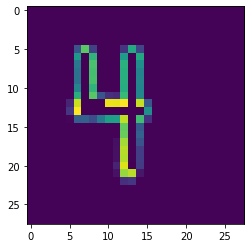

In [ ]:
data = np.asarray(image_resized)
plt.imshow(1-data)
data = 1 - data.reshape((1,28 * 28)) / 255

# Testando


---
Agora que a imagem está no mesmo esquema que aquelas no dataset, podemos testar.


In [ ]:
result = network.predict(data)
print("A rede acha que o número da imagem é: ", np.argmax(result))

A rede acha que o número da imagem é:  4
